##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

في هذا الدرس سيتم شرح تدريب بسيط لشبكة عصبية [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) لتصنيف [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html).  [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), هذا الدرس يستخدم Keras Sequential API  لنتمكن من تدريب الشبكة العصبية في بضع سطور .


### نبدأ بتضمين TensorFlow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### نقوم بتحميل مجموعة الصور CIFAR 10

مجموعة الصور هذه تتكون من 60 ألف صورة ملونة منقسمين إلي 10 أقسام كل قسم منهم يحتوي علي 6 ألاف صورة. هذه المجموعة تتكون من 50 ألف صورة للتدريب و 10 ألاف صورة لإختبار الشبكة العصبية. لا يوجد تشابه بين الصور في التدريب والاختبار


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 11s 0us/step


### نتحقق من الصور

لنتحقق من أن الصور تبدو صحيحة. نبدأ بإظهار أول  25 صورة من مجموعة التدريب ونظهر اسم القسم التي تنتمي له كل صورة



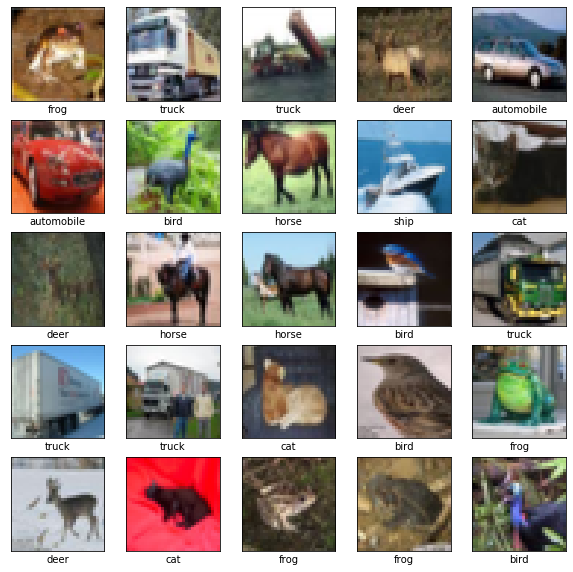

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### نبدأ بإنشاء CNN

في أول 6 سطور من الكود نبدأ بتعريف بنمط متعارف عليه ألا وهو أكوام من الconvolutions و Max pooling  
 [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)  [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) .

المدخل للشبكة العصبية هو مصفوفة تتكون من (طول الصوره,عرض الصورة,عدد قنوات الألوان)
و قنوات الألوان تشير  إلي الأحمر و الأزرق و الأخضر .
في هذا المثال سنجعل المدخل يكون مصفوفة في شكل )32,32,3( لأن الصور ملونة و طولها و عرضها = 32 و يمكنك فعل ذك بتمرير  `input_shape` إلي أول طبقة

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

سنعرض طبقات و شكل الشبكة العصبية

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


فوق, يمكنك أن تري أن المخرج من هذه الطبقات هو مصفوفة ثلاثية الأبعاد وتتكون من طول وعرض وعدد قنوات. الطول والعرض في نقصان كلما زادت الطبقات. أما عدد القنوات يمكنك التحكم فيه من أول معطي (مثال 32 أو 64) و يمكنك زيادة عدد القنوات لأن الطول والعرض للصورة في نقصان

### نبدأ في إضافة Dense layers 
لنكمل النموذج سنبدأ بإدخال المصفوفة الخارجة من طبقات الconvultions التي تخرج في شكل
(4,4,64) إلي dense layers لنقوم بالتصنيف بين الأقسام 
هذا الطبقات يكون المدخل لها هو متجه وهو أحادي البعد فيجب أن نقوم أولا بتحويل المصفوفة التي كانت ثلاثية الأبعاد إلي متجه و نضيف من هذه الطبقات و نجعل أخر طبقة تتكون من 10 وحدات وهو عدد الأقسام التي سيتم تصنيفهم 

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

هنا نعرض الشكل الكامل للشبكة العصبية

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6


نلاحظ أنه تم تحويل المصفوفة ثلاثية الأبعاد بالشكل (4,4,64) إلي متجه واحد يتكون من 1024 عنصر (4*4*64) 
و تم تحويله قبل أن يدخل علي الdense layers

### نقوم بتدريب النموذج

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 149us/sample - loss: 1.5137 - accuracy: 0.4460 - val_loss: 1.2258 - val_accuracy: 0.5576
Epoch 2/10
50000/50000 [==============================] - 5s 103us/sample - loss: 1.1579 - accuracy: 0.5889 - val_loss: 1.1571 - val_accuracy: 0.6037
Epoch 3/10
50000/50000 [==============================] - 5s 110us/sample - loss: 1.0127 - accuracy: 0.6440 - val_loss: 1.0387 - val_accuracy: 0.6333
Epoch 4/10
50000/50000 [==============================] - 6s 110us/sample - loss: 0.9128 - accuracy: 0.6804 - val_loss: 0.9930 - val_accuracy: 0.6653
Epoch 5/10
50000/50000 [==============================] - 5s 106us/sample - loss: 0.8430 - accuracy: 0.7060 - val_loss: 0.8915 - val_accuracy: 0.6926
Epoch 6/10
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7855 - accuracy: 0.7240 - val_loss: 0.8823 - val_accuracy: 0.6989
Epoch 7/10
50000/50000 [==========================

### نقوم بتقييم النموذج

10000/10000 - 1s - loss: 0.9077 - accuracy: 0.7073


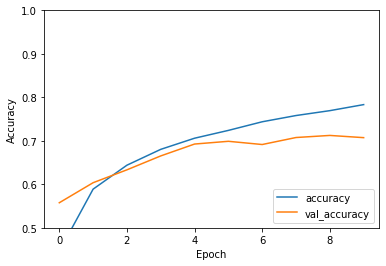

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7073


شبكتنا العصبية البسيطة حصلت علي دقة حوالي 70% و هو شيء ليس سيئا لبضع سطور من الكود 
يمكنك أن تري مثال أخر لكن باستخدام Keras subclassing APIو
 `tf.GradientTape` [هنا](https://www.tensorflow.org/tutorials/quickstart/advanced).